In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "basilicata"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,32.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2020-12-23T17:00:00,17,Basilicata,91,9,100,5772,5872,-60,99,...,3.0,1417.0,671.0,-59.0,9.00,1.70,6.99,14.75,12.50,-1.01
303,2020-12-24T17:00:00,17,Basilicata,96,8,104,5839,5943,71,155,...,4.0,1681.0,742.0,67.0,7.69,1.75,9.22,20.89,-11.11,1.21
304,2020-12-25T17:00:00,17,Basilicata,87,7,94,5862,5956,13,69,...,5.0,853.0,364.0,23.0,7.45,1.58,8.09,18.96,-12.50,0.22
305,2020-12-26T17:00:00,17,Basilicata,89,7,96,5864,5960,4,25,...,1.0,151.0,56.0,2.0,7.29,1.61,16.56,44.64,0.00,0.07


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 9
Nuovi tamponi: 63.0
Percentuale nuovi positivi/nuovi tamponi: 14.299999999999999 %
Nuovi guariti: 9.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: 9.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: -8.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-28T17:00:00,17,Basilicata,73,7,80,1104,1184,108,120,...,3.0,1451.0,1761.0,103.0,8.75,6.76,8.27,6.81,0.00,10.04
1,2020-10-29T17:00:00,17,Basilicata,74,7,81,1175,1256,72,86,...,0.0,1004.0,994.0,71.0,8.64,6.45,8.57,8.65,0.00,6.08
2,2020-10-30T17:00:00,17,Basilicata,74,7,81,1254,1335,79,95,...,1.0,1826.0,1826.0,79.0,8.64,6.07,5.20,5.20,0.00,6.29
3,2020-10-31T17:00:00,17,Basilicata,83,7,90,1356,1446,111,117,...,1.0,1703.0,1693.0,102.0,7.78,6.22,6.87,6.91,0.00,8.31
4,2020-11-01T17:00:00,17,Basilicata,86,11,97,1498,1595,149,150,...,0.0,1511.0,1511.0,142.0,11.34,6.08,9.93,9.93,57.14,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-23T17:00:00,17,Basilicata,91,9,100,5772,5872,-60,99,...,3.0,1417.0,671.0,-59.0,9.00,1.70,6.99,14.75,12.50,-1.01
57,2020-12-24T17:00:00,17,Basilicata,96,8,104,5839,5943,71,155,...,4.0,1681.0,742.0,67.0,7.69,1.75,9.22,20.89,-11.11,1.21
58,2020-12-25T17:00:00,17,Basilicata,87,7,94,5862,5956,13,69,...,5.0,853.0,364.0,23.0,7.45,1.58,8.09,18.96,-12.50,0.22
59,2020-12-26T17:00:00,17,Basilicata,89,7,96,5864,5960,4,25,...,1.0,151.0,56.0,2.0,7.29,1.61,16.56,44.64,0.00,0.07


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

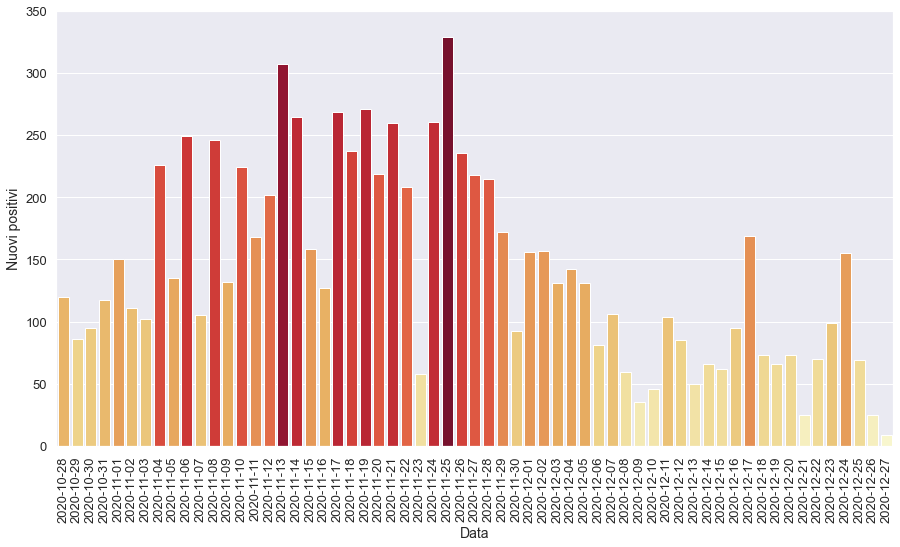

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

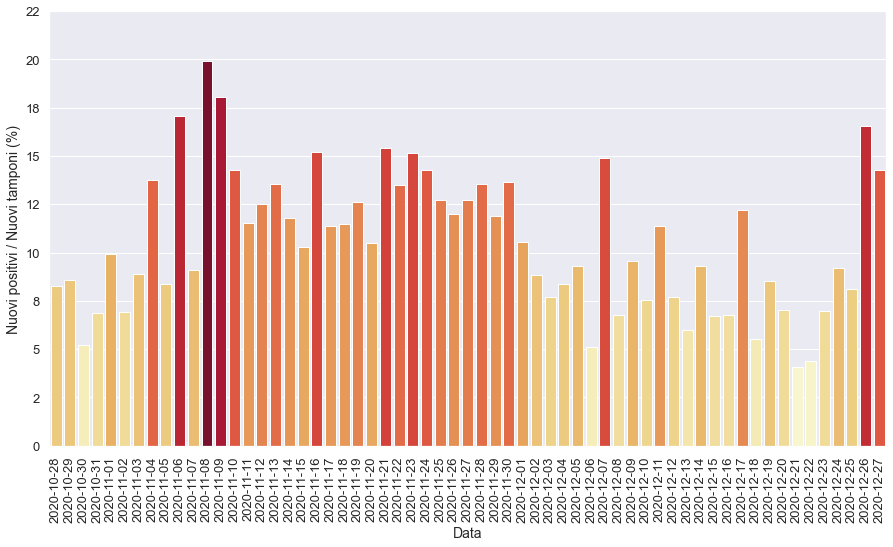

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

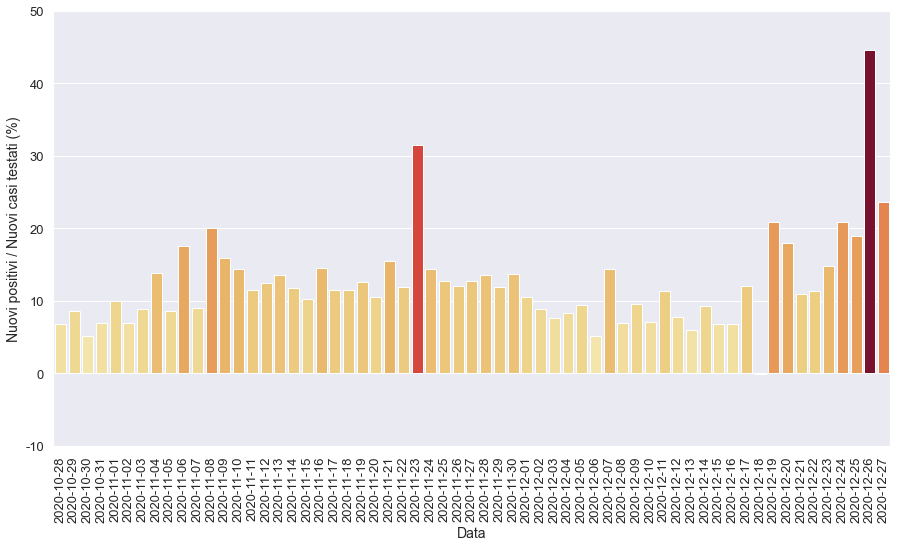

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

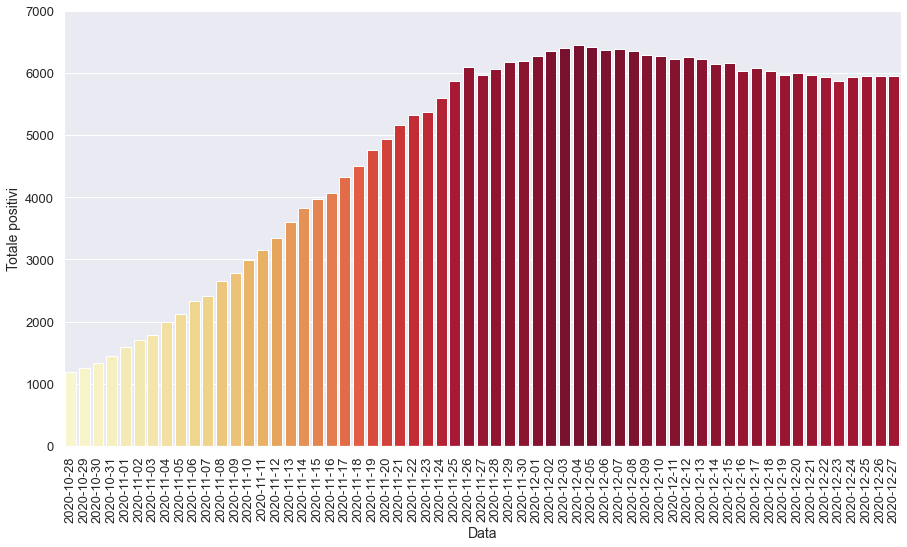

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

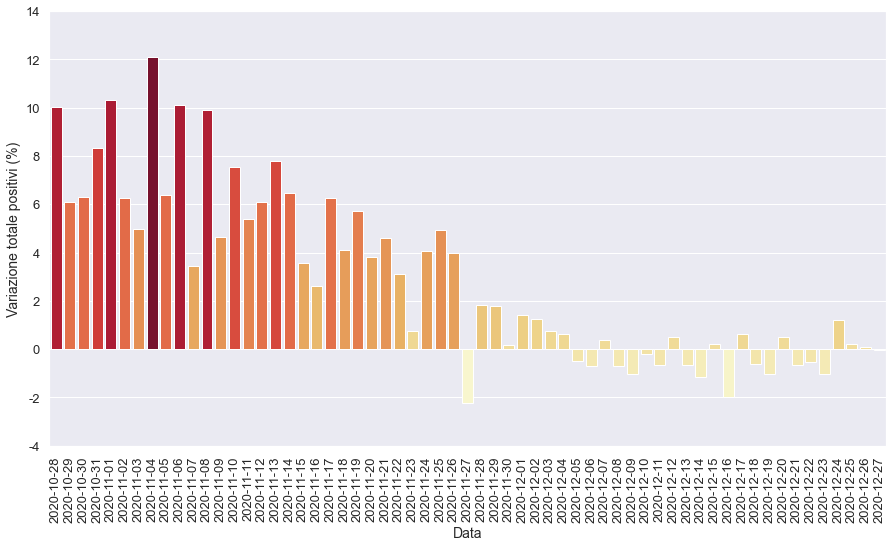

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

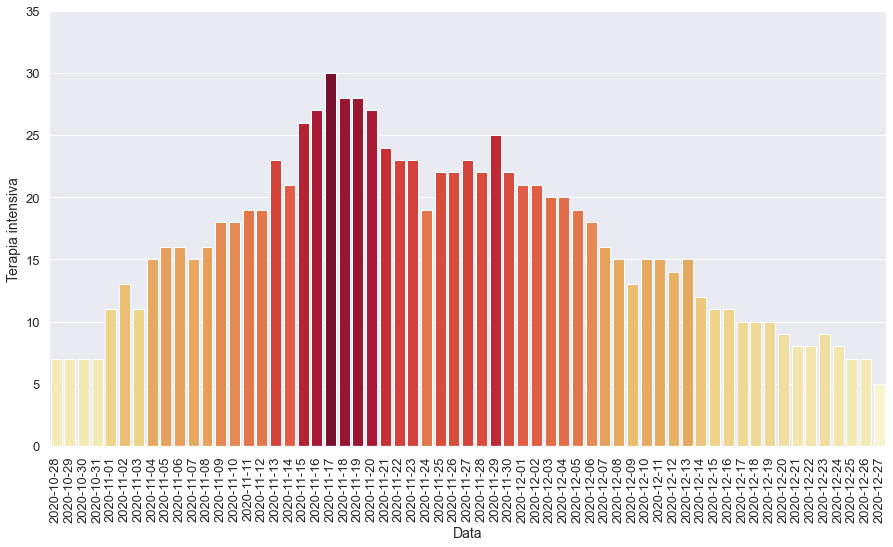

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

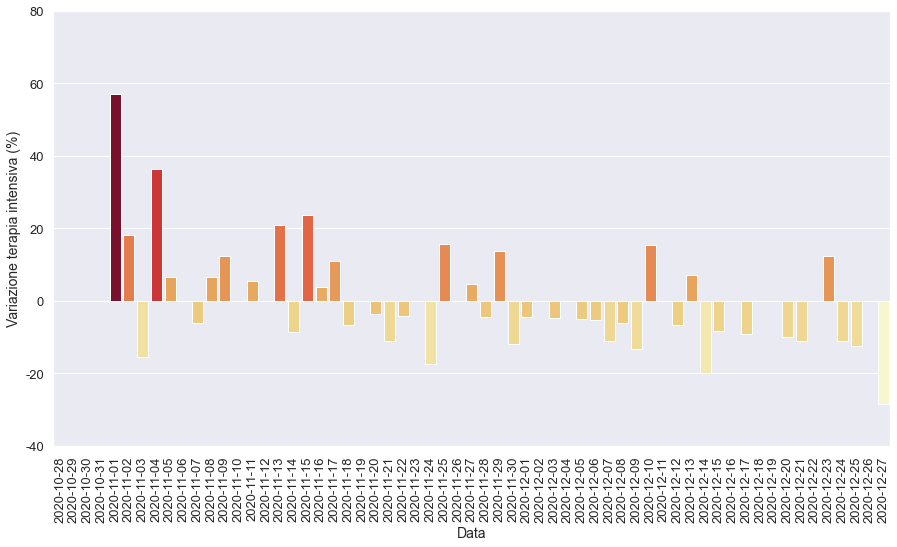

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

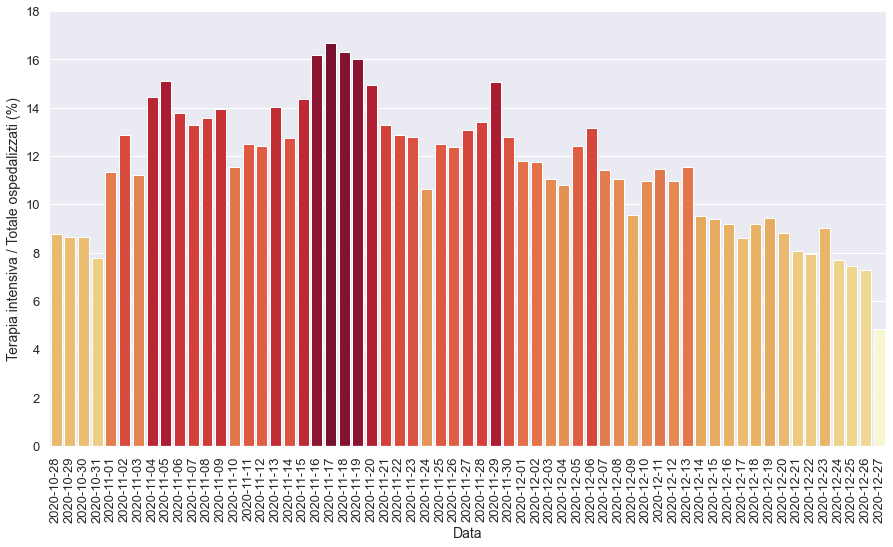

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

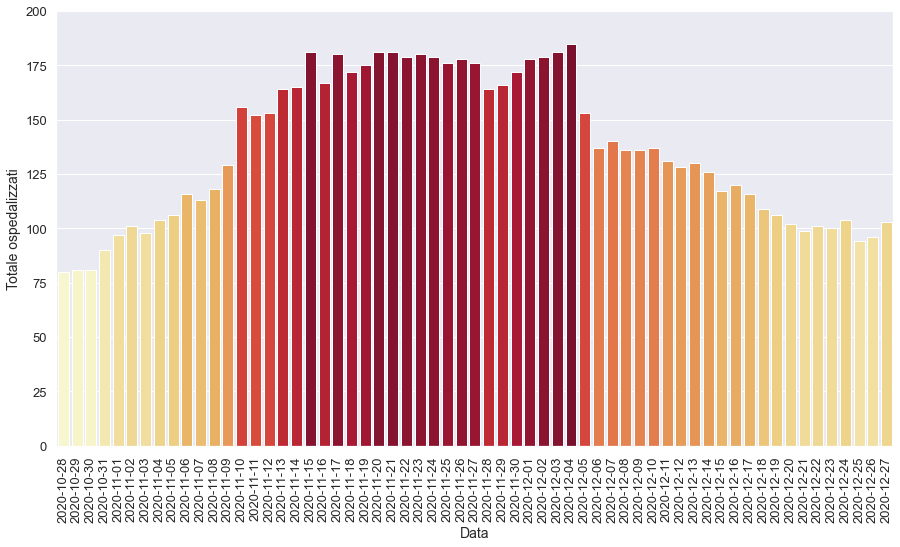

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

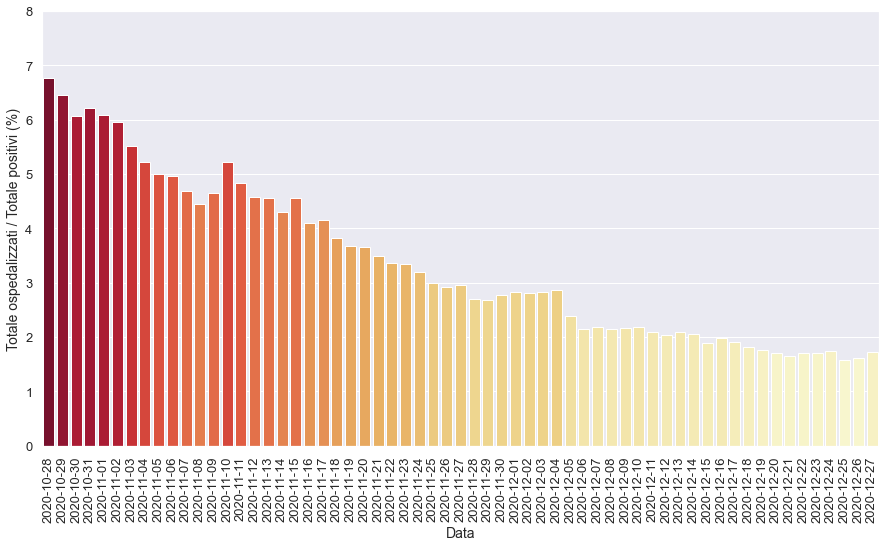

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

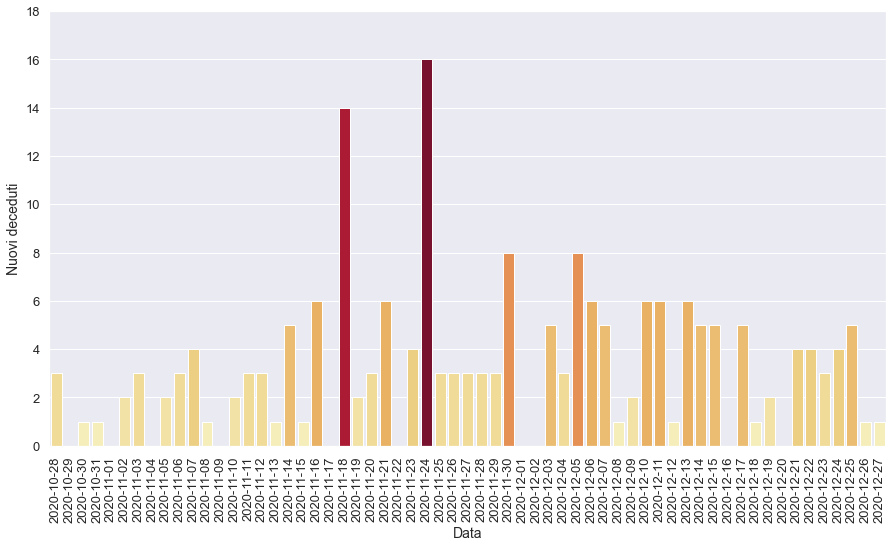

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

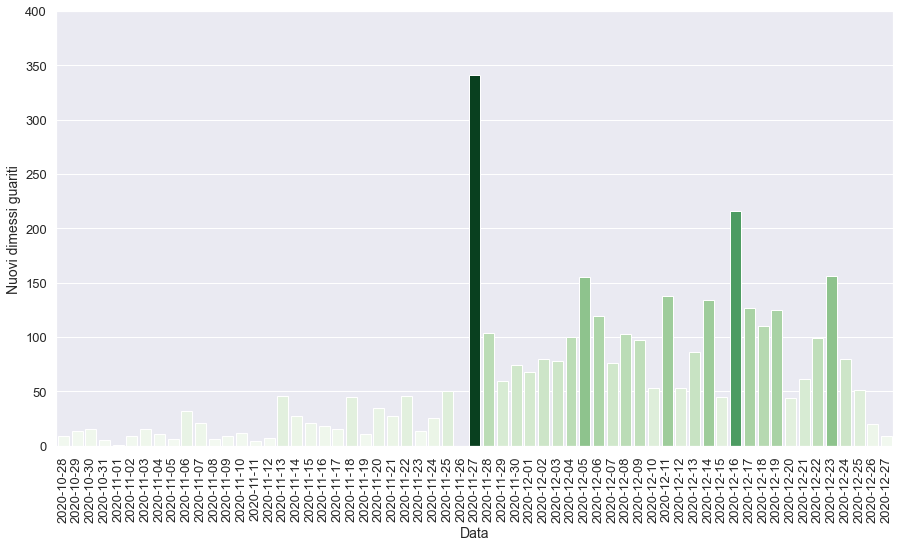

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-27T17:00:00,17,Basilicata,153,23,176,5789,5965,-135,218,...,3.0,1714.0,1713.0,-133.0,13.07,2.95,12.72,12.73,4.55,-2.21
1,2020-11-28T17:00:00,17,Basilicata,142,22,164,5909,6073,108,215,...,3.0,1586.0,1588.0,120.0,13.41,2.70,13.56,13.54,-4.35,1.81
2,2020-11-29T17:00:00,17,Basilicata,141,25,166,6016,6182,109,172,...,3.0,1446.0,1445.0,107.0,15.06,2.69,11.89,11.90,13.64,1.79
3,2020-11-30T17:00:00,17,Basilicata,150,22,172,6020,6192,10,92,...,8.0,673.0,673.0,4.0,12.79,2.78,13.67,13.67,-12.00,0.16
4,2020-12-01T17:00:00,17,Basilicata,157,21,178,6102,6280,88,156,...,0.0,1476.0,1476.0,82.0,11.80,2.83,10.57,10.57,-4.55,1.42
5,2020-12-02T17:00:00,17,Basilicata,158,21,179,6178,6357,77,157,...,0.0,1776.0,1776.0,76.0,11.73,2.82,8.84,8.84,0.00,1.23
6,2020-12-03T17:00:00,17,Basilicata,161,20,181,6224,6405,48,131,...,5.0,1700.0,1705.0,46.0,11.05,2.83,7.71,7.68,-4.76,0.76
7,2020-12-04T17:00:00,17,Basilicata,165,20,185,6259,6444,39,142,...,3.0,1701.0,1716.0,35.0,10.81,2.87,8.35,8.28,0.00,0.61
8,2020-12-05T17:00:00,17,Basilicata,134,19,153,6259,6412,-32,131,...,8.0,1412.0,1392.0,0.0,12.42,2.39,9.28,9.41,-5.00,-0.50
9,2020-12-06T17:00:00,17,Basilicata,119,18,137,6231,6368,-44,81,...,6.0,1585.0,1590.0,-28.0,13.14,2.15,5.11,5.09,-5.26,-0.69


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

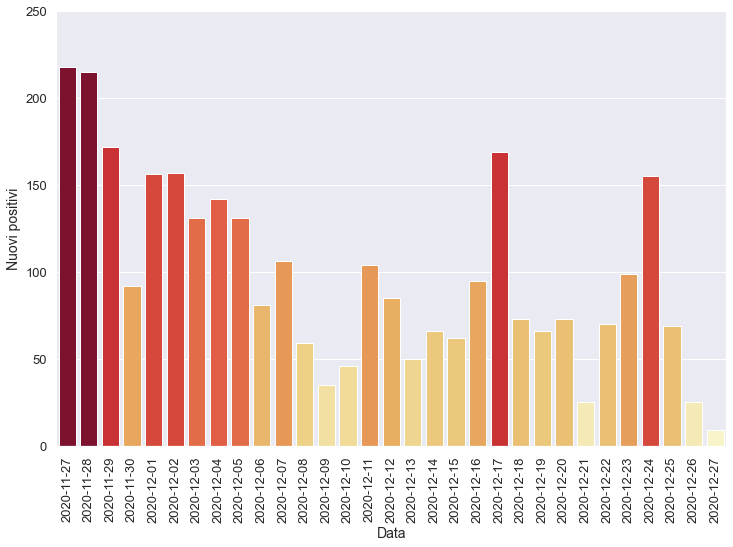

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

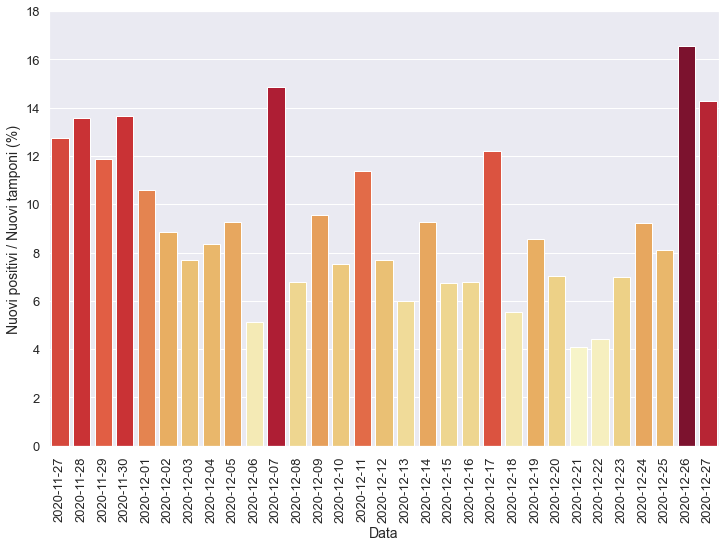

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

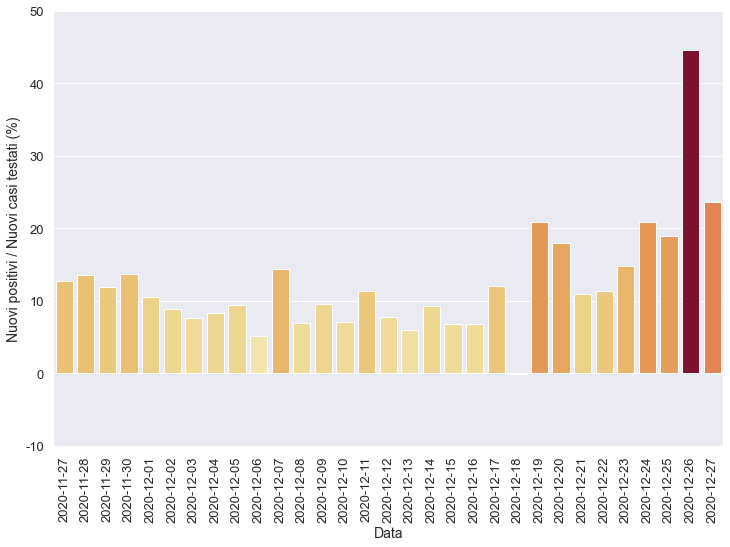

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

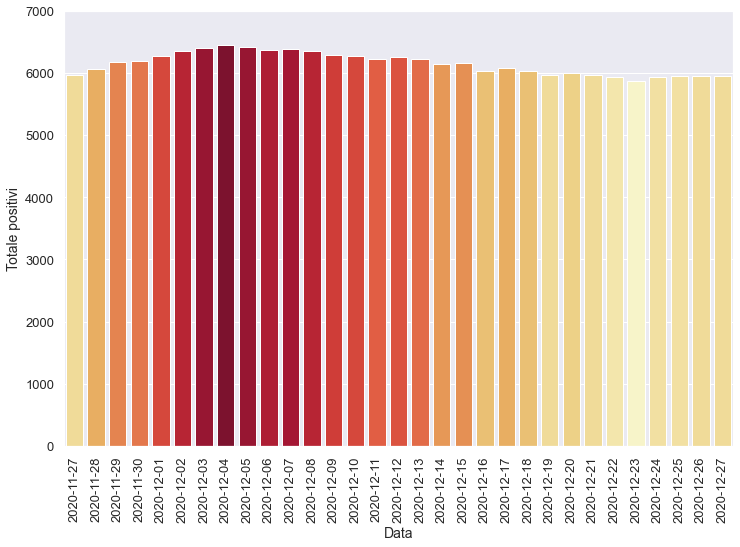

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

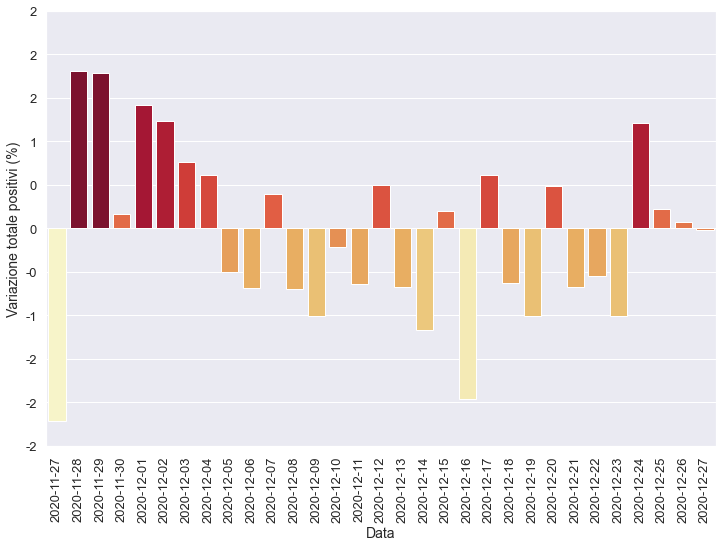

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

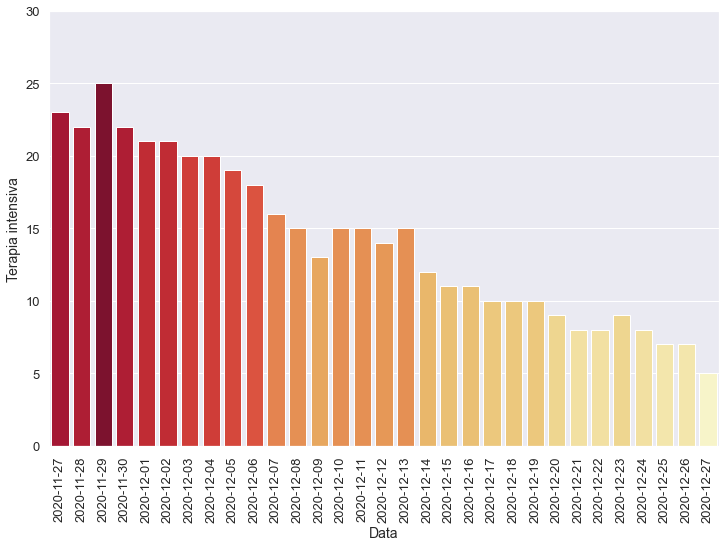

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

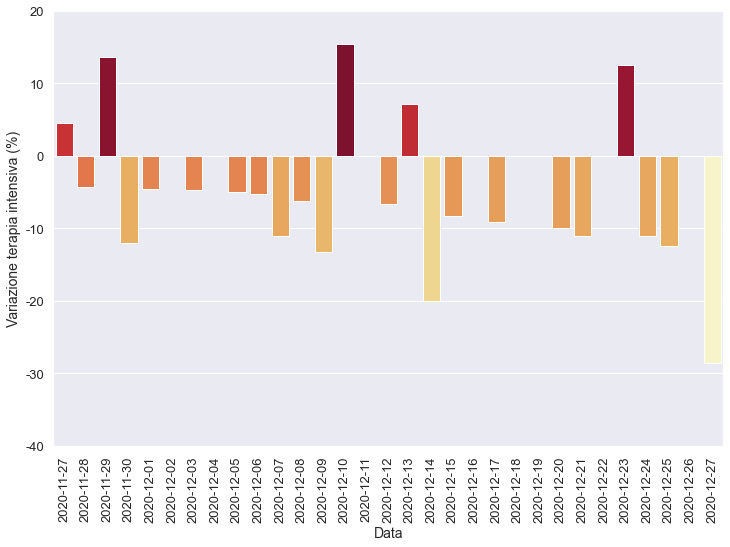

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

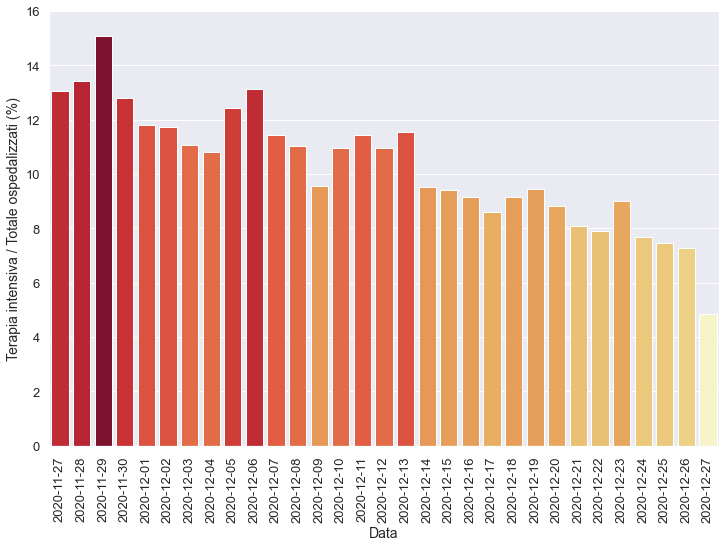

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

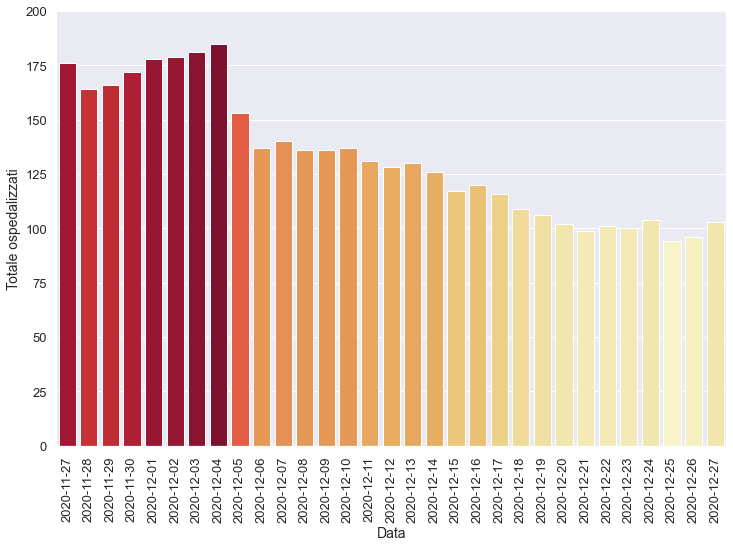

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

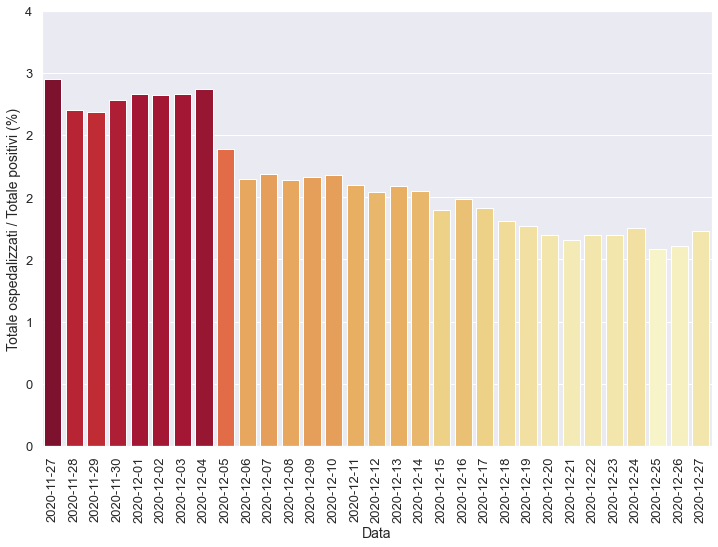

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

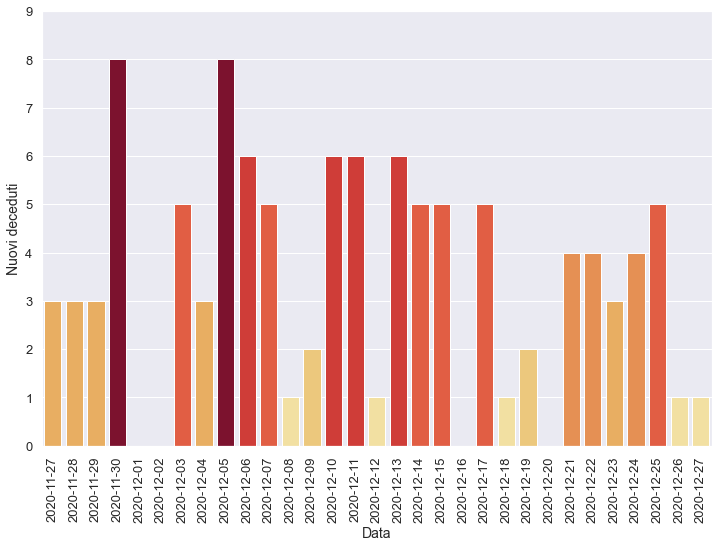

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

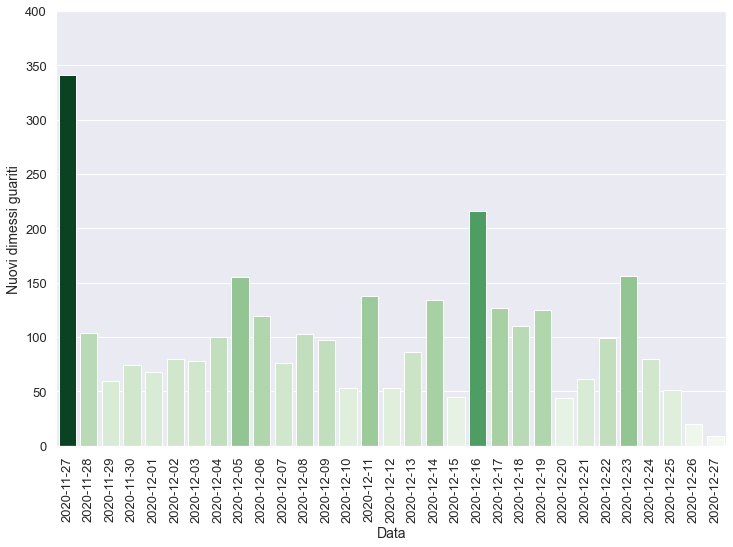

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-20T17:00:00,17,Basilicata,93,9,102,5903,6005,29,73,...,0.0,1039.0,407.0,33.0,8.82,1.70,7.03,17.94,-10.00,0.49
1,2020-12-21T17:00:00,17,Basilicata,91,8,99,5866,5965,-40,25,...,4.0,610.0,229.0,-37.0,8.08,1.66,4.10,10.92,-11.11,-0.67
2,2020-12-22T17:00:00,17,Basilicata,93,8,101,5831,5932,-33,70,...,4.0,1587.0,615.0,-35.0,7.92,1.70,4.41,11.38,0.00,-0.55
3,2020-12-23T17:00:00,17,Basilicata,91,9,100,5772,5872,-60,99,...,3.0,1417.0,671.0,-59.0,9.00,1.70,6.99,14.75,12.50,-1.01
4,2020-12-24T17:00:00,17,Basilicata,96,8,104,5839,5943,71,155,...,4.0,1681.0,742.0,67.0,7.69,1.75,9.22,20.89,-11.11,1.21
5,2020-12-25T17:00:00,17,Basilicata,87,7,94,5862,5956,13,69,...,5.0,853.0,364.0,23.0,7.45,1.58,8.09,18.96,-12.50,0.22
6,2020-12-26T17:00:00,17,Basilicata,89,7,96,5864,5960,4,25,...,1.0,151.0,56.0,2.0,7.29,1.61,16.56,44.64,0.00,0.07
7,2020-12-27T17:00:00,17,Basilicata,98,5,103,5856,5959,-1,9,...,1.0,63.0,38.0,-8.0,4.85,1.73,14.29,23.68,-28.57,-0.02


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

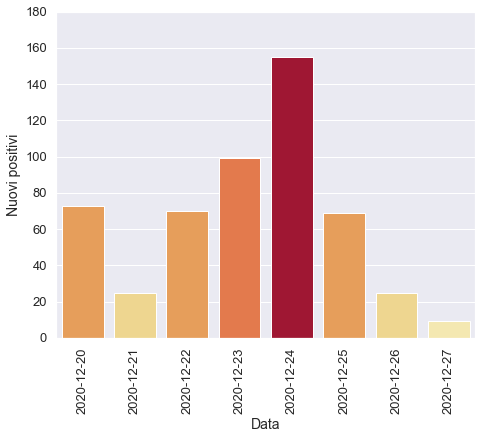

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

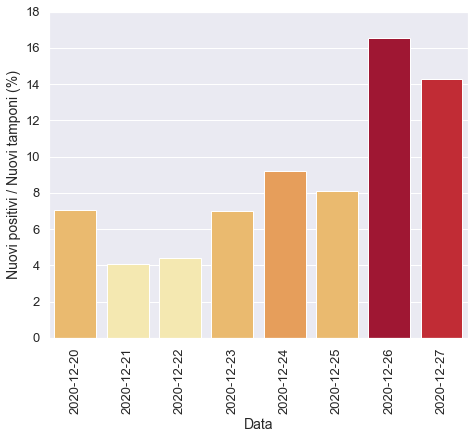

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

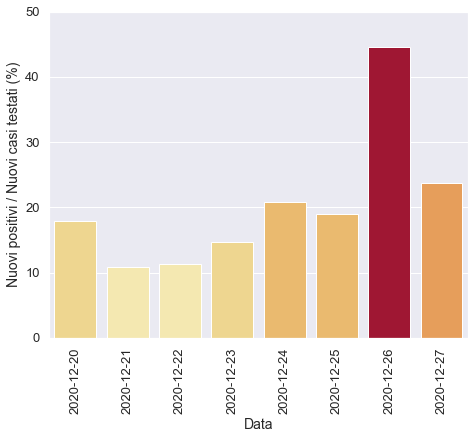

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

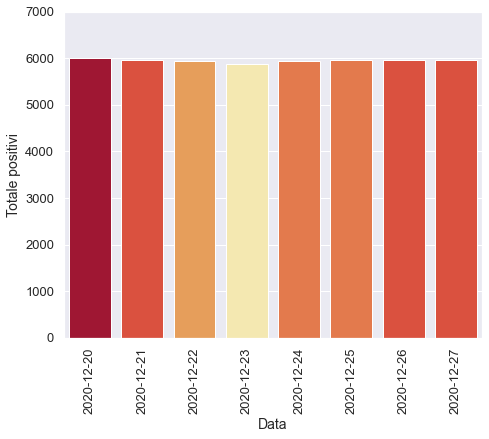

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

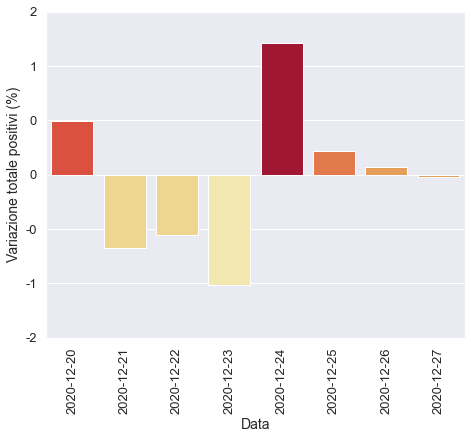

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

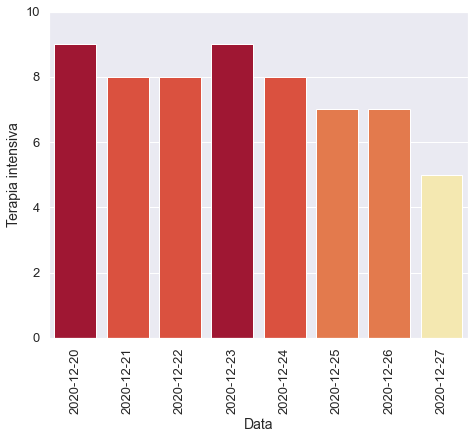

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

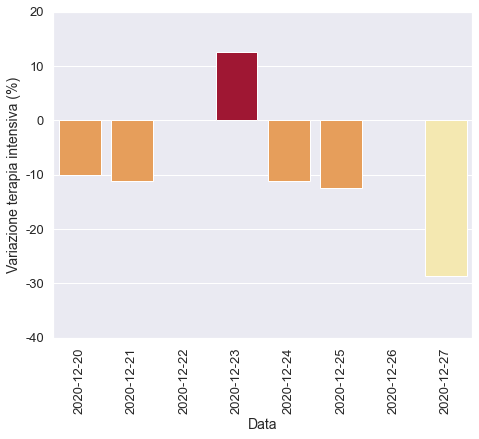

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

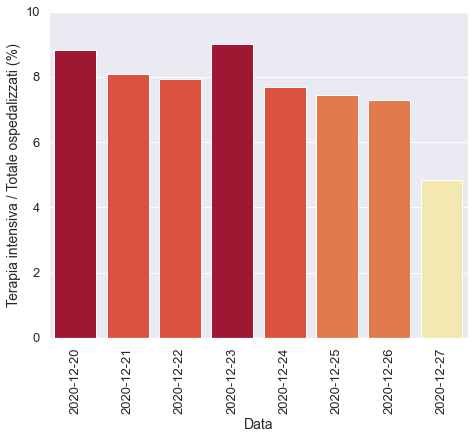

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

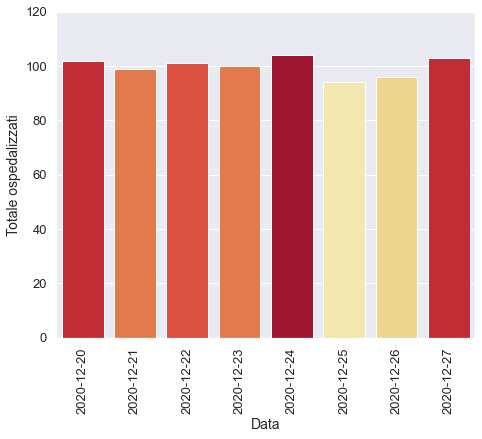

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

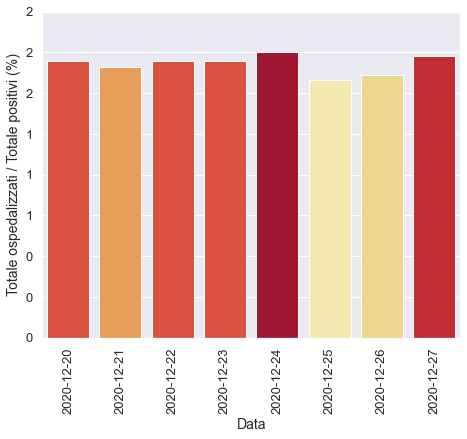

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

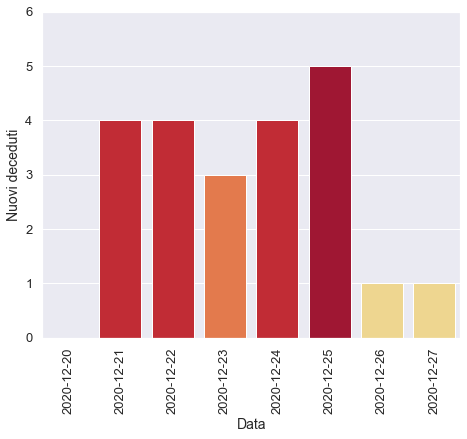

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

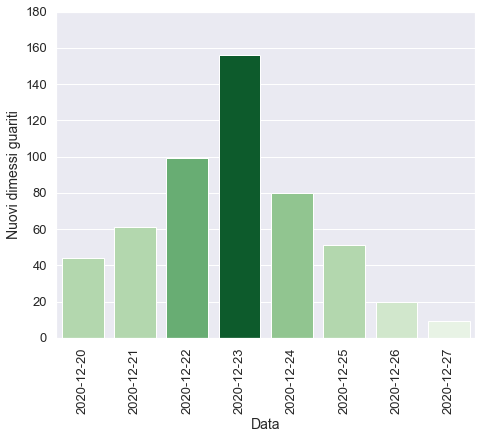

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)